# Question 1
a) sample 1000 data points (x) from a uniform distribution over (1,10) and plot $$y=5x+2$$

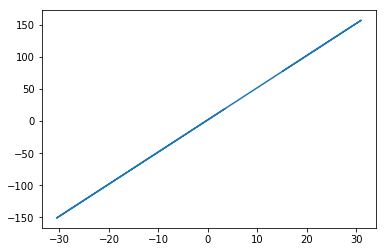

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(1,10,1000)
y = 5*x + 2
plt.plot(x,y)
plt.show()

b) sample "noise" $n$ for each data point from $$\mathcal{N}\left(0,\sigma^2\right)$$ where $$\sigma^2=1$$ show the scatter plot $$y'=5\left(x+n\right)+2$$ against the plot of the previously defined y



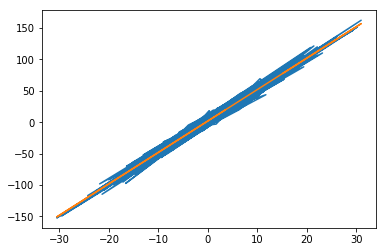

In [22]:
noise = np.random.normal(0,1,1000)
yprime = 5*(x+noise) + 2
plt.plot(x,yprime, x, y)
plt.show()

c) perform linear regression to generate $\hat{y}$ an approximation of $y$ from $(y',x)$. show a scatter plot of $y'$ against a plot of $y$, and $\hat{y}$

--

The following imports point to functions that may be useful to you. You can also solve the least squares problem using nothing by matrix arithmetic in numpy. 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In the next cell are examples showing how to turn a "flat" numpy array to a row / column vector 

In [24]:
import numpy as np
a = np.array([1, 2, 3])
a_row_v = a[np.newaxis, :]
a_col_v = a[:, np.newaxis]
print(a.shape)
print(a_row_v.shape)
print(a_col_v.shape)

(3,)
(1, 3)
(3, 1)


d) compute the $r^2$ score and the square residual sum (RSS)

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(x,yprime)

-15.625084616521903

# Question 2
repeat for additive gaussian noise with $\sigma^2=2, 5, 10, 20 $. Are the estimated intercept and coefficient close to the true values? if not, why?

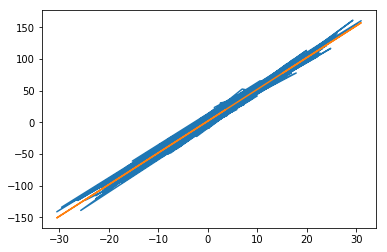

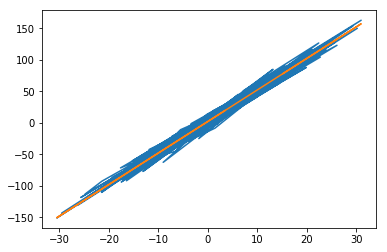

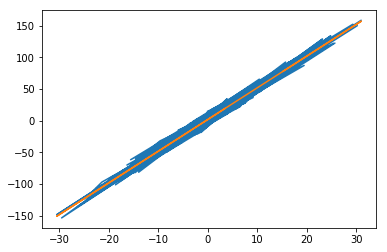

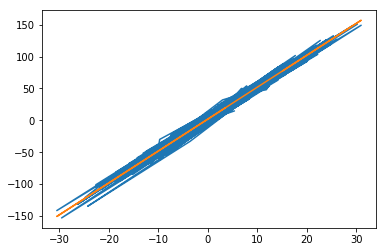

In [28]:
sigmas = [2,5,10,20]
for sigma in sigmas:
    noise = np.random.normal(0,1,1000)
    yprime= 5*(x+noise) + 2
    plt.plot(x,yprime, x, y)
    plt.show()
    

The estimated intercept and coefficient are still close to the true values?

# Question 3
a) Load the data in lin_reg_data.csv to a pandas data frame, and perform a linear regression for the x column Vs. the y column. Print the intercept and coefficient. 

In [57]:
import pandas as pd
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()

lin_pd = pd.read_csv("lin_reg.csv")

x = lin_pd['x']
y = lin_pd['y']

x = np.asarray(x)
x = x.reshape(-1,1)

regr.fit(x, y)
intercept = regr.predict(np.asarray([0]).reshape(-1,1))
coef = regr.coef_

print("intercept: " + str(intercept[0]))
print("coefficient: " + str(coef[0]))



intercept: 15.977832295492027
coefficient: 0.5725740502127358


b) Repeat for the first 90% of the rows. Are the results similar? 

In [65]:
ninety_percent = int(len(lin_pd)*.9)
x2 = lin_pd.loc[:ninety_percent,'x']
y2 = lin_pd.loc[:ninety_percent,'y']

x2 = np.asarray(x2)
x2 = x2.reshape(-1,1)

regr.fit(x2, y2)
intercept = regr.predict(np.asarray([0]).reshape(-1,1))
coef = regr.coef_

print("intercept: " + str(intercept[0]))
print("coefficient: " + str(coef[0]))



intercept: 10.022726416526202
coefficient: -3.006071551729606


Results are different

c) Perform a regression for the first 90% of the points for x and y you generated in Q1. Are the results there similar to those of the regression performed on all points?

In [68]:
x3 = np.random.normal(1,10,1000)
y3 = 5*x3 + 2

ninety_percent = int(len(x3)*.9)
x3 = x3[:ninety_percent]
y3 = y3[:ninety_percent]

x3 = np.asarray(x3)
x3 = x3.reshape(-1,1)

regr.fit(x3, y3)
intercept = regr.predict(np.asarray([0]).reshape(-1,1))
coef = regr.coef_

print("intercept: " + str(intercept[0]))
print("coefficient: " + str(coef[0]))

intercept: 1.9999999999999964
coefficient: 5.000000000000002


Results are different

d) Plot the residuals for the regression performed on the all rows of the data frame

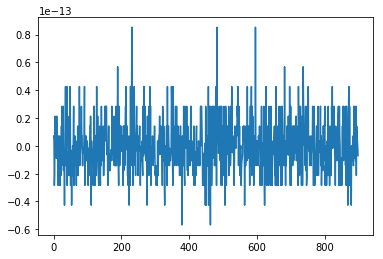

In [83]:
regr.fit(x3, y3)
y_predict = intercept = regr.predict(x3)
error = y_predict - y3

fig= plt.plot(error)
plt.show()

e) plot a scatter plot of the x and y columns, can you explain this phenomenon?

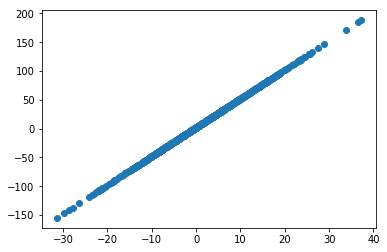

In [85]:
fig= plt.scatter(x3,y3)
plt.show()

The residual is extremely small becuase there is no noise or bias in the data